---
title: Model interpretation and hypothesis testing
teaching: 45
exercises: 2
keypoints:
- "All models are wrong, but some are useful.""
objectives:
- "Understand how to use statistics to evaluate the likelihood of existing relationships recovered by a multivariate model."
- "Understand how to interpret a regression model and evaluate the strength/direction of different predictor and target relationships." 
questions:
- "How can multivariate models be used to detect interesting relationships found in nature?"
- "How can we interpret statistical results with minor violations of model assumptions?"
---

### Hypothesis testing and signfiicant features/predictors
We will ultimately use hypothesis testing to determine if our model has found any statistically signficant relationships. What does it mean to be statistically signficiant? It means that an observed relationship is unlikely (< 5% chance if p=.05) to occur due to chance alone. 

To run statistics on a regression model, we start with two hypotheses — one null and one alternative.
* H₀ (Null hypothesis): m == 0 (i.e., slope is flat)
* H₁ (Alternative hypothesis): m != 0 (i.e.., slope is not completely flat) 

In other words, we are testing to see if a predictor has a consistent effect on some target variable. We are NOT testing the magnitidute of the effect (we will discuss effect sizes later); simply whether or not an observed effect is due to chance or not. In statistics, we start with the null hypothesis as our default and review evidence (the fitted model and its estimated parameters and error measurement) to see if the observed data suggests that the null hypothesis should be rejected.

### Overview of hypothesis testing procedure
The procedure for testing whether predictor(s) have a statistically significant effect on a target variable in a regression model typically involves the following steps:

1. **Formulate the null hypothesis (H₀) and alternative hypothesis (H₁) for the test.** The null hypothesis typically states that the predictor has no effect on the response variable (coef=0), while the alternative hypothesis suggests that there is a significant effect (coef!=0).

2. **If using multiple predictors, check for multicollinearity.** Multicollinearity can be an especially pervasive.

3. **Fit the regression model to your data.** Obtain the estimated coefficients for each predictor, along with their standard errors.

4. **Check for evidence of overfitting**: If overfitting occurs, it doesn't make much sense to make general claims about observed relationships in the model.

4. **Evaluate linearity assumption**: If using a univariate model, can do this step before model fitting via a simple scatterplot.

5. **Evaluate normality of errors assumption.**

6. **Calculate the test statistic**: Calculate the test statistic based on the estimated coefficient and its standard error. The test statistic depends on the specific regression model and hypothesis being tested. Common test statistics include t-statistic, z-statistic, or F-statistic.

6. **Determine the critical value**: Determine the critical value or significance level (α) at which you want to test the hypothesis. The significance level typically ranges from 0.01 to 0.05, depending on the desired level of confidence.

7. **Compare the test statistic and critical value**: Compare the calculated test statistic with the critical value. If the test statistic falls within the critical region (i.e., the calculated p-value is less than the significance level), you reject the null hypothesis and conclude that the predictor is statistically significant. If the test statistic does not fall within the critical region, you fail to reject the null hypothesis, indicating that the predictor is not statistically significant.

8. **Interpret the results**: Based on the conclusion from the hypothesis test, interpret the significance of the predictor. If the predictor is deemed statistically significant, it suggests that there is evidence of a relationship between the predictor and the response variable. If the predictor is not statistically significant, it implies that there is no significant evidence of an effect.

It's important to note that significance tests provide statistical evidence for or against the null hypothesis, but they should be interpreted alongside other factors such as effect size, practical significance, and the context of the problem being studied. Additionally, it's crucial to consider the assumptions and limitations of the regression model and the underlying data when interpreting the model.

We'll begin by working with the model from the last episode's exercise. Recall that this model had residuals which deviated from normality slightly. Out of all model assumptions, normal residuals is the least strict. We will discuss how to report this deviation from normality when we write up the results of the statistical tests.

Neighborhood_Blmngtn removed, most_common_val = 0, presence = 98.84
Neighborhood_Blueste removed, most_common_val = 0, presence = 99.86
Neighborhood_BrDale removed, most_common_val = 0, presence = 98.9
Neighborhood_BrkSide removed, most_common_val = 0, presence = 96.03
Neighborhood_ClearCr removed, most_common_val = 0, presence = 98.08
Neighborhood_Crawfor removed, most_common_val = 0, presence = 96.51
Neighborhood_IDOTRR removed, most_common_val = 0, presence = 97.47
Neighborhood_MeadowV removed, most_common_val = 0, presence = 98.84
Neighborhood_Mitchel removed, most_common_val = 0, presence = 96.64
Neighborhood_NPkVill removed, most_common_val = 0, presence = 99.38
Neighborhood_NoRidge removed, most_common_val = 0, presence = 97.19
Neighborhood_SWISU removed, most_common_val = 0, presence = 98.29
Neighborhood_SawyerW removed, most_common_val = 0, presence = 95.96
Neighborhood_StoneBr removed, most_common_val = 0, presence = 98.29
Neighborhood_Timber removed, most_common_val = 0, pre

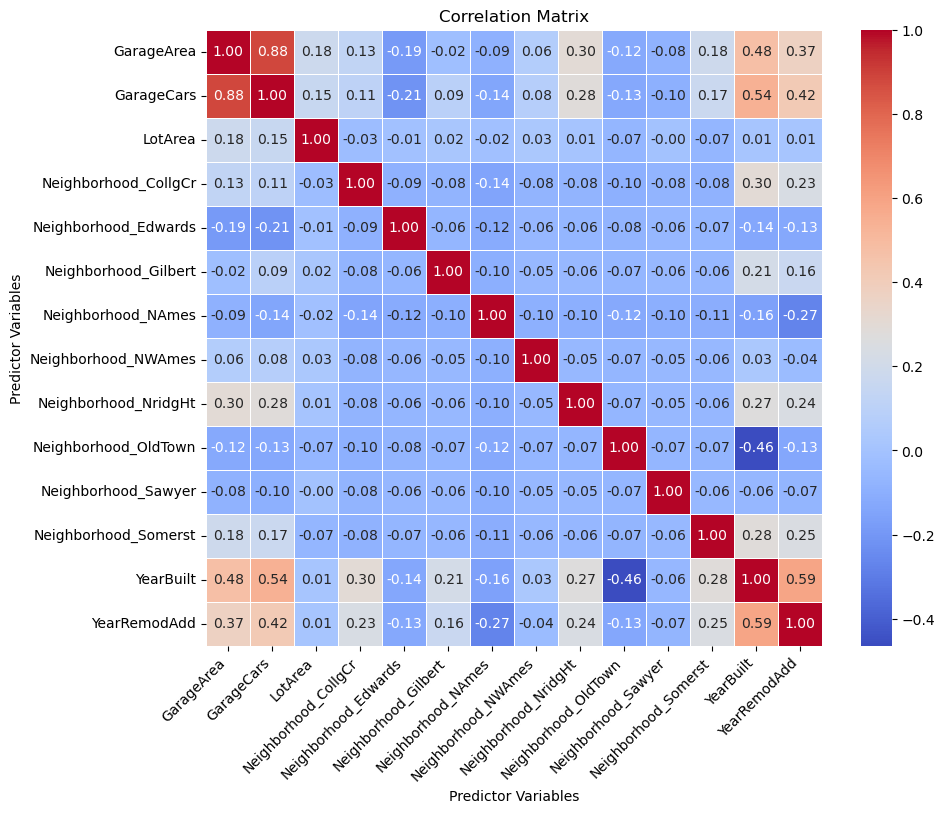


VERIFYING MULTICOLLINEARITY...
                Variable       VIF
0             GarageArea  7.757408
1                LotArea  2.239206
2   Neighborhood_CollgCr  1.350229
3   Neighborhood_Edwards  1.236703
4   Neighborhood_Gilbert  1.166287
5     Neighborhood_NAmes  1.465777
6    Neighborhood_NWAmes  1.159278
7   Neighborhood_NridgHt  1.288820
8   Neighborhood_OldTown  1.249199
9    Neighborhood_Sawyer  1.157742
10  Neighborhood_Somerst  1.249040
11          YearRemodAdd  9.285893


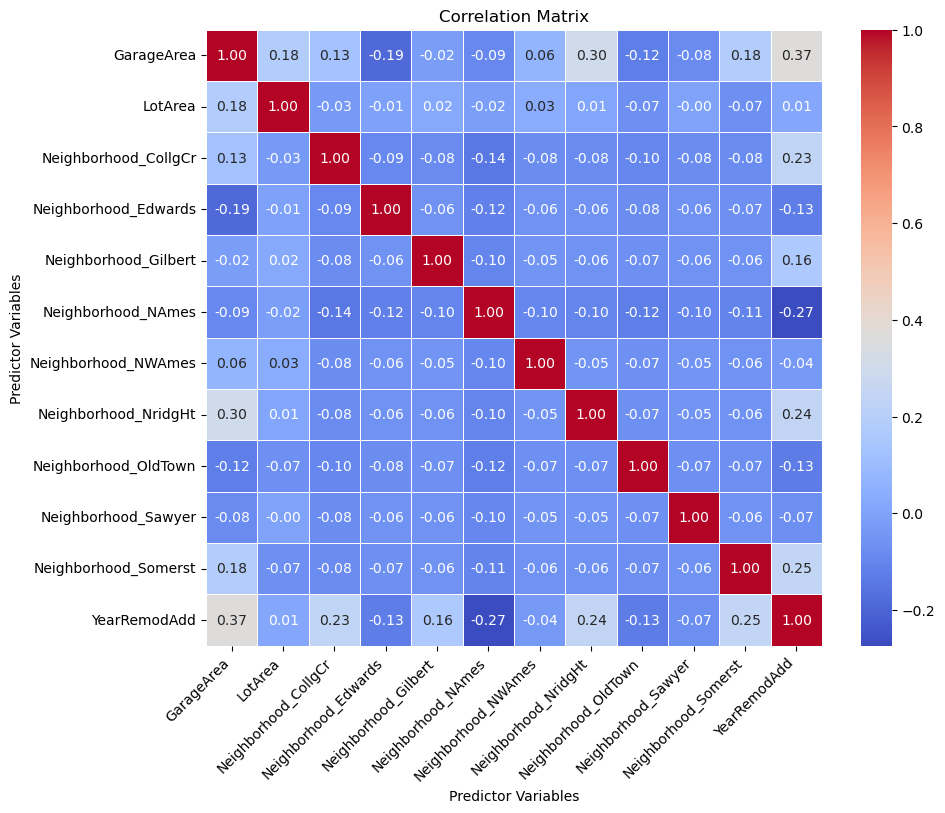


VERIFYING MULTICOLLINEARITY...
                Variable       VIF
0             GarageArea  1.403296
1                LotArea  1.057810
2   Neighborhood_CollgCr  1.275199
3   Neighborhood_Edwards  1.166506
4   Neighborhood_Gilbert  1.142521
5     Neighborhood_NAmes  1.264983
6    Neighborhood_NWAmes  1.098685
7   Neighborhood_NridgHt  1.256041
8   Neighborhood_OldTown  1.152291
9    Neighborhood_Sawyer  1.116459
10  Neighborhood_Somerst  1.221762
11          YearRemodAdd  1.503561


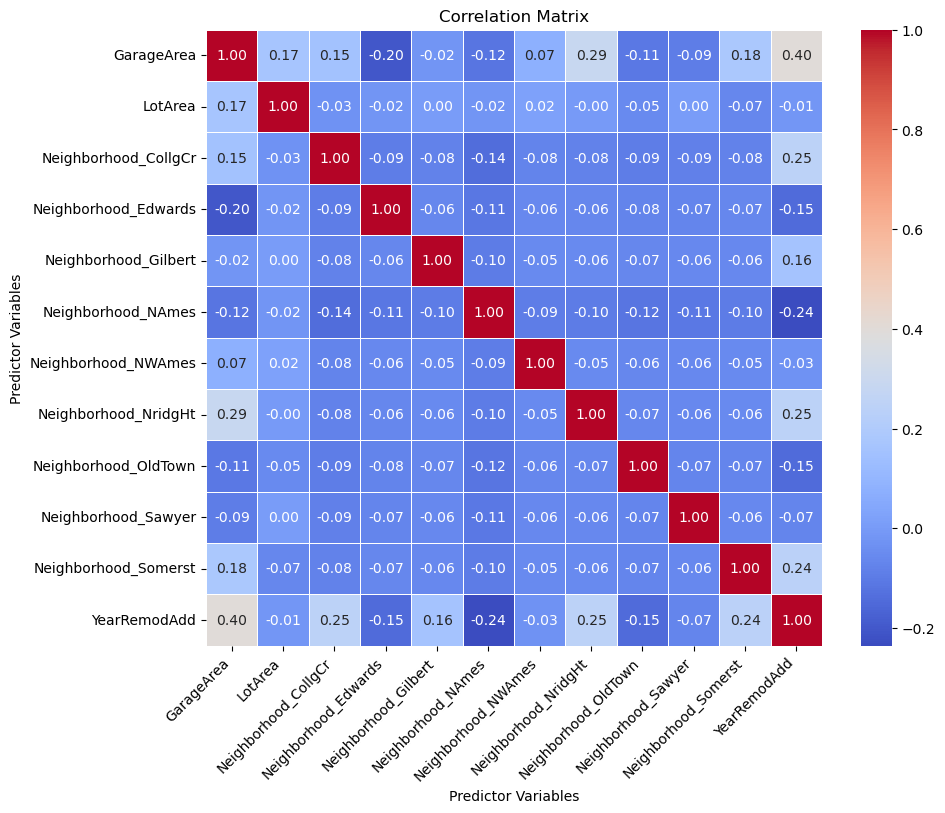


VERIFYING LINEARITY & HOMOSCEDASTICITY...

 Goldfeld-Quandt test (homoscedasticity) ----
                value
F statistic  0.831952
p-value      0.977493
Homoscedasticity test: Passes (homoscedasticity is assumed)

 Residuals plots ----


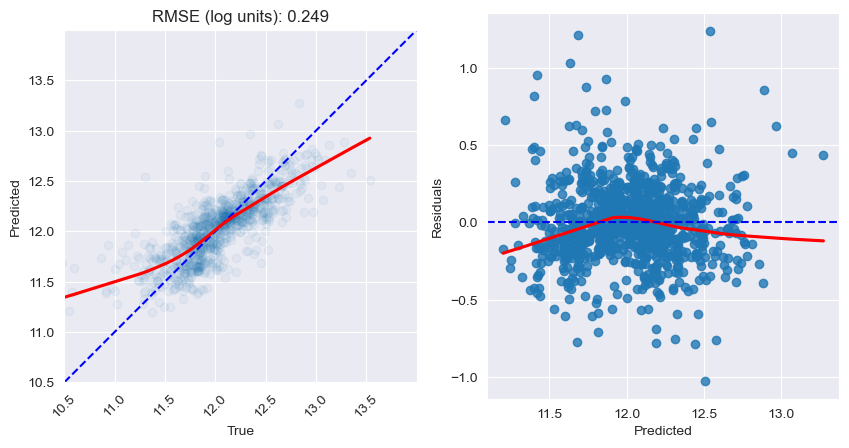


VERIFYING NORMAL ERRORS...
Median of residuals: 0.004087877077902924
Skewness of resids (+/- 0.5 is bad): -0.42300070977189735
Shapiro-Wilk test: statistic=0.9730, p-value=0.0000000000
Shapiro-Wilk test passes: False
Kolmogorov-Smirnov test: statistic=0.3038, p-value=0.0000000000
Kolmogorov-Smirnov test passes: False


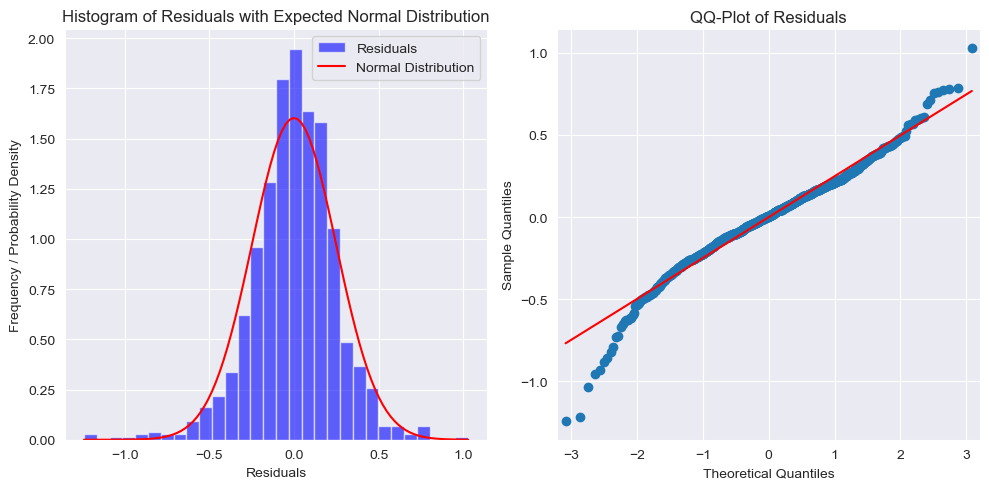


VERIFYING INDEPENDENT ERRORS...
Durbin-Watson test statistic: 2.022691389055886
Durbin-Watson test statistic is within the expected range (1.5 to 2.5) for no significant autocorrelation.


In [1]:
from exercise_solutions import regression_assumptions_e1_explore_altPredictors
trained_model = regression_assumptions_e1_explore_altPredictors()

#### Preview the model summary (nice perk from statsmodels package)

In [2]:
trained_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     131.7
Date:                Sat, 12 Aug 2023   Prob (F-statistic):          1.19e-193
Time:                        13:04:51   Log-Likelihood:                -27.825
No. Observations:                 978   AIC:                             81.65
Df Residuals:                     965   BIC:                             145.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.0260      0.008   1500.602      0.000      12.010      12.042
YearRemodAdd             0.1343      0.010     13.660      0.000       0.115       0.154
LotArea                  0.0669      0.008      8.111      0.000       0.051       0.083
GarageArea               0.1779      0.009     18.725      0.000       0.159       0.196
Neighborhood_CollgCr    -0.0144      0.009     -1.593      0.111      -0.032       0.003
Neighborhood_Edwards    -0.0384      0.009     -4.431      0.000      -0.055      -0.021
Neighborhood_Gilbert     0.0038      0.009      0.447      0.655      -0.013       0.021
Neighborhood_NAmes      -0.0210      0.009     -2.334      0.020      -0.039      -0.003
Neighborhood_NWAmes      0.0115      0.008      1.363      0.173      -0.005       0.028
Neighborhood_NridgHt     0.0385      0.009      4.287      0.000       0.021       0.056
Neighborhood_OldTown    -0.0504      0.009     -5.856      0.000      -0.067      -0.034
Neighborhood_Sawyer     -0.0367      0.008     -4.337      0.000      -0.053      -0.020
Neighborhood_Somerst    -0.0035      0.009     -0.392      0.695      -0.021       0.014
==============================================================================
Omnibus:                       86.068   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.402
Skew:                          -0.422   Prob(JB):                     2.85e-57
Kurtosis:                       5.383   Cond. No.                         2.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Calculating the test statistic
**t-statistic**: The t-statistic is typically used to test the statistical significance of individual coefficient estimates in the regression model. It measures the ratio of the estimated coefficient to its standard error. The t-test helps assess whether a specific predictor variable has a significant effect on the response variable while accounting for the uncertainty in the coefficient estimate.

P-values for t-statistics are calculated based on the t-distribution. The t-distribution is a probability distribution that is used when the population standard deviation is unknown and needs to be estimated from the sample.

To calculate the p-value for a t-statistic, you follow these general steps:

1. Formulate the null hypothesis (H0) and alternative hypothesis (H1) for the test you are conducting.

2. Calculate the t-statistic for the test using the formula:

    t = (estimate - null_value) / standard_error
    
    where "estimate" is the estimated coefficient or difference, "null_value" is the value specified under the null hypothesis (often 0), and "standard_error" is the standard error of the coefficient or difference estimate.

4. Determine the degrees of freedom (df) for the t-distribution. In simple linear regression, the degrees of freedom are typically n - 2, where n is the number of observations. In multivariate regression, the degrees of freedom depend on the number of predictors and the sample size.

5. Look up the p-value associated with the calculated t-value and degrees of freedom in the t-distribution table or use statistical software to calculate it. The p-value represents the probability of observing a t-value as extreme as, or more extreme than, the calculated value under the null hypothesis.

6. Compare the p-value to the predetermined significance level (commonly 0.05). If the p-value is less than the significance level, you reject the null hypothesis in favor of the alternative hypothesis. If the p-value is greater than or equal to the significance level, you fail to reject the null hypothesis.

By calculating the p-value for the t-statistic, you can assess the statistical significance of the coefficient estimate or the difference being tested. A lower p-value indicates stronger evidence against the null hypothesis and suggests a higher likelihood that a significant relationship or effect exists. It does not mean that the effect is stronger.

#### The more manual route of calculating p-values... 
In this code, after fitting the multivariate regression model and obtaining the coefficient estimates in the coefs Series and the standard errors in the std_errs Series, we calculate the t-values by dividing the coefficient estimates by the standard errors. The t-value represents the ratio of the estimated coefficient (or difference) to its standard error. It measures the number of standard errors by which the estimated coefficient differs from zero. The standard error reflects the precision of the estimated coefficient, and a larger t-value indicates a larger difference relative to the standard error.

Next, we use the t-values to calculate the two-sided p-values using the stats.t.sf function from the SciPy library. The np.abs(t_values) ensures that we consider the absolute values of the t-values to calculate the p-values for both positive and negative t-values. We multiply the resulting p-values by 2 to obtain the two-sided p-values. The p-value is the probability of observing a t-value as extreme as, or more extreme than, the one calculated, assuming the null hypothesis is true. By convention, if the p-value is smaller than a predetermined significance level (commonly 0.05), we reject the null hypothesis in favor of the alternative hypothesis, indicating that the coefficient is statistically significant.

Dividing the t-value by the standard error yields a test statistic that follows a t-distribution with degrees of freedom determined by the sample size and the complexity of the model. By looking up the p-value associated with the calculated test statistic in the t-distribution table or using statistical software, we can determine the probability of observing such an extreme or more extreme value. This probability is the p-value.

In summary, dividing the t-value by the standard error is a way to standardize the coefficient estimate and quantify its significance relative to its precision. The resulting test statistic follows a t-distribution, and by calculating the associated p-value, we can assess the statistical significance of the coefficient estimate and make inference about its relationship with the predictor variable.

In [3]:
from scipy import stats
import numpy as np

# Get the coefficient estimates and standard errors
coefs = trained_model.params
std_errs = trained_model.bse

# Calculate the t-values and p-values
t_values = coefs / std_errs
p_values = stats.t.sf(np.abs(t_values), df=trained_model.df_resid) * 2
p_values

array([0.00000000e+00, 5.77683408e-39, 1.51433066e-15, 5.63916857e-67,
       1.11482797e-01, 1.04392453e-05, 6.54771638e-01, 1.98182267e-02,
       1.73282954e-01, 1.99578527e-05, 6.51408046e-09, 1.59324911e-05,
       6.94929557e-01])

#### The faster route

In [4]:
p_values = trained_model.pvalues
print(p_values)
p_values[p_values < .05]

const                   0.000000e+00
YearRemodAdd            5.776834e-39
LotArea                 1.514331e-15
GarageArea              5.639169e-67
Neighborhood_CollgCr    1.114828e-01
Neighborhood_Edwards    1.043925e-05
Neighborhood_Gilbert    6.547716e-01
Neighborhood_NAmes      1.981823e-02
Neighborhood_NWAmes     1.732830e-01
Neighborhood_NridgHt    1.995785e-05
Neighborhood_OldTown    6.514080e-09
Neighborhood_Sawyer     1.593249e-05
Neighborhood_Somerst    6.949296e-01
dtype: float64


const                   0.000000e+00
YearRemodAdd            5.776834e-39
LotArea                 1.514331e-15
GarageArea              5.639169e-67
Neighborhood_Edwards    1.043925e-05
Neighborhood_NAmes      1.981823e-02
Neighborhood_NridgHt    1.995785e-05
Neighborhood_OldTown    6.514080e-09
Neighborhood_Sawyer     1.593249e-05
dtype: float64

In [5]:
# alternatively, use model summary
trained_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     131.7
Date:                Sat, 12 Aug 2023   Prob (F-statistic):          1.19e-193
Time:                        13:04:51   Log-Likelihood:                -27.825
No. Observations:                 978   AIC:                             81.65
Df Residuals:                     965   BIC:                             145.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.0260      0.008   1500.602      0.000      12.010      12.042
YearRemodAdd             0.1343      0.010     13.660      0.000       0.115       0.154
LotArea                  0.0669      0.008      8.111      0.000       0.051       0.083
GarageArea               0.1779      0.009     18.725      0.000       0.159       0.196
Neighborhood_CollgCr    -0.0144      0.009     -1.593      0.111      -0.032       0.003
Neighborhood_Edwards    -0.0384      0.009     -4.431      0.000      -0.055      -0.021
Neighborhood_Gilbert     0.0038      0.009      0.447      0.655      -0.013       0.021
Neighborhood_NAmes      -0.0210      0.009     -2.334      0.020      -0.039      -0.003
Neighborhood_NWAmes      0.0115      0.008      1.363      0.173      -0.005       0.028
Neighborhood_NridgHt     0.0385      0.009      4.287      0.000       0.021       0.056
Neighborhood_OldTown    -0.0504      0.009     -5.856      0.000      -0.067      -0.034
Neighborhood_Sawyer     -0.0367      0.008     -4.337      0.000      -0.053      -0.020
Neighborhood_Somerst    -0.0035      0.009     -0.392      0.695      -0.021       0.014
==============================================================================
Omnibus:                       86.068   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.402
Skew:                          -0.422   Prob(JB):                     2.85e-57
Kurtosis:                       5.383   Cond. No.                         2.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpret the results

The model performance is as follows:

* R-squared: 0.621
* Adjusted R-squared: 0.616
* F-statistic: 131.7 with a very low p-value (1.19e-193), indicating that the model as a whole is statistically significant.
* Number of Observations: 978

The following predictors were found to have p-values < .05: 
* const                   0.000000e+00
* YearRemodAdd            5.776834e-39
* GarageArea              5.639169e-67
* LotArea                 1.514331e-15
* Neighborhood_Edwards    1.043925e-05
* Neighborhood_NAmes      1.981823e-02
* Neighborhood_NridgHt    1.995785e-05
* Neighborhood_OldTown    6.514080e-09
* Neighborhood_Sawyer     1.593249e-05

Contextual Note:
The significance of predictors like YearRemodAdd, GarageArea, and LotArea suggests that they have a meaningful impact on SalePrice. However, the Jarque-Bera test for normality and the associated p-value (2.85e-57) indicate that the residuals deviate from a normal distribution, supporting our earlier tests of normal residuals. Specifically, the model has a tendency to overestimate low-value homes and underestimate high-value homes. It's important to keep in mind that while normality of residuals is an assumption of linear regression, minor deviations may not invalidate the entire model, especially if the deviation is not severe and the other assumptions (such as linearity, homoscedasticity, and independence of residuals) are met. Our model still provides valuable insights into the relationships between predictor variables and the target SalePrice. The R-squared value of 0.621 suggests that approximately 62.1% of the variance in SalePrice can be explained by the predictor variables in the model. However, given the observed pattern in residuals, it is important to pay closer attention to how these predictors affect homes in different SalePrice ranges. The model's accuracy could vary depending on whether you're predicting prices for low-value or high-value homes.

In summary, while the model's residuals show some deviation from normality, the provided regression results still offer insights into the relationships between predictor variables and SalePrice. Careful consideration of the model's assumptions, limitations, and context will help you interpret the results accurately. As the statistician George Box famously said, "All models are wrong, but some are useful." This reminds us that models are simplifications of reality, and while they may not perfectly capture all aspects, they can still provide valuable insights and guidance.

### Feature importance 
In addition to running hypothesis tests, we should look more closely at the specific strenght of relationships found between predictors and target. A straightforward way to do this (assuming you have zscored the predictors) is to plot the coef values and magnitudes.

In [6]:
# Get coefficient values
coefs = trained_model.params
coefs

const                   12.025984
YearRemodAdd             0.134300
LotArea                  0.066891
GarageArea               0.177854
Neighborhood_CollgCr    -0.014424
Neighborhood_Edwards    -0.038375
Neighborhood_Gilbert     0.003833
Neighborhood_NAmes      -0.021045
Neighborhood_NWAmes      0.011453
Neighborhood_NridgHt     0.038521
Neighborhood_OldTown    -0.050399
Neighborhood_Sawyer     -0.036748
Neighborhood_Somerst    -0.003477
dtype: float64

In [7]:
from interpret_model import coef_plot
help(coef_plot)

Help on function coef_plot in module interpret_model:

coef_plot(coefs: pandas.core.series.Series, plot_const: bool) -> matplotlib.figure.Figure
    Plot coefficient values and feature importance based on sorted feature importance.
    
    Args:
        coeffs (pd.Series): Coefficient values.
        plot_const (bool): Whether or not to plot the y-intercept coef value
    
    Returns:
        plt.Figure: The figure containing the coefficient plots.



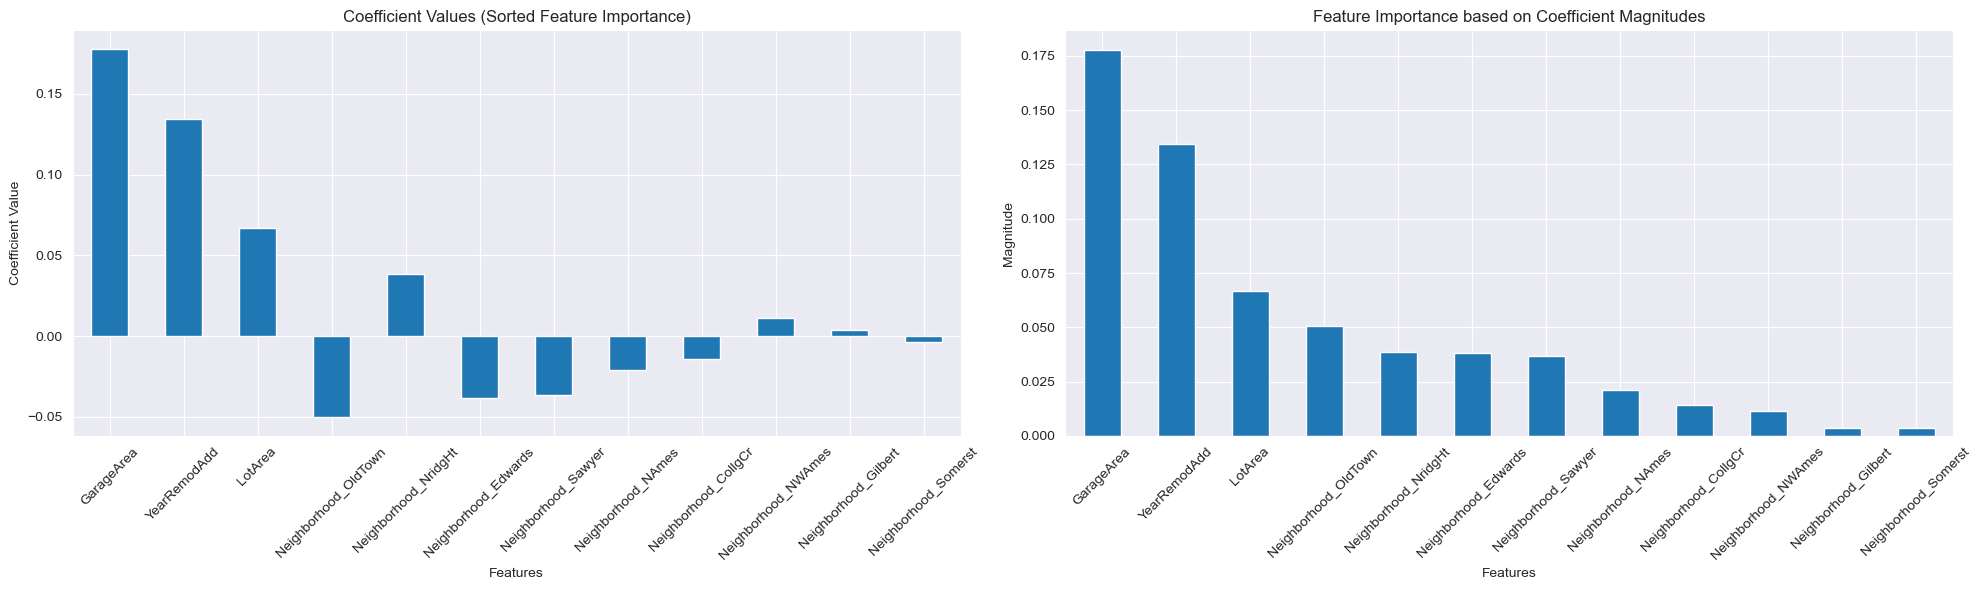

In [8]:
fig = coef_plot(coefs=coefs, plot_const=False)
# fig.savefig('..//fig//regression//interpret//coef_plot.png', bbox_inches='tight', dpi=300, facecolor='white');

<img src="../fig/regression/interpret/coef_plot.png"  align="center" width="70%" height="70%">